### Projeto de BI constando indicadores de performance do SUS utilizando dados do IBGE.
Professor: Wilson Wagner Barroso Marques.
Disciplina: Gerenciamento de Serviços no Ciberespaço. 8º Semestre.

Alunos:
- Gabriel Fonseca (2111066)
- Yasmim Santos (2116925)
- Gustavo Santos (2110999)
- Pedro Lucas (2111131)

Importando bibliotecas que serão utilizadas:

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

Dados de moradores por município.

In [137]:
scaler = MinMaxScaler()

moradores_df = pd.read_csv(
  "../data/contagem_moradores_por_cidade.csv",
  header=0,
  dtype={
    'MUNICÍPIO': 'string',
    'TOTAL_MORADORES': 'int'
  }
)

moradores_df["MUNICÍPIO"] = (
    moradores_df["MUNICÍPIO"]
    .str.upper()
    .str.normalize("NFKD")
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
)

### Indicador #1 - Renda per-capita.

O primeiro indicador busca inferir a relação entre a renda per-capita e o número de pessoas atendidas pelo SUS por município, a hipótese sendo que com a elevação da renda média, mais pessoas optarão por alternativas do setor privado.

Leitura e tratamento dos dados.

In [138]:
# Carregar os dados dos arquivos CSV
pib_df = pd.read_csv(
  "../data/renda.csv",
  header=0,
  dtype={
    'Local': 'string',
    'PIB': 'float'
  }
)

# Normalizar os nomes dos municípios (remover acentos e transformar em letras maiúsculas para combinar corretamente)
pib_df["Local"] = (
    pib_df["Local"]
    .str.upper()
    .str.normalize("NFKD")
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
)

# Unir os DataFrames pelos municípios
merged_df = pd.merge(
    pib_df, moradores_df, left_on="Local", right_on="MUNICÍPIO", how="inner"
)

# Renomear colunas para facilitar a compreensão
merged_df = merged_df.rename(
    columns={"TOTAL_MORADORES": "Moradores_SUS"}
).drop(columns=["MUNICÍPIO"])

merged_df

,Local,PIB,Moradores_SUS
0,ABAIARA,9859.67,231
1,ACARAPE,11888.66,495
2,ACARAU,16051.99,2368
3,ACOPIARA,10322.74,1331
4,AIUABA,8621.26,570
...,...,...,...
178,URUBURETAMA,13475.87,1524
179,URUOCA,21318.78,735
180,VARJOTA,20292.61,675
181,VARZEA ALEGRE,11395.42,874


Criando gráfico de dispersão.

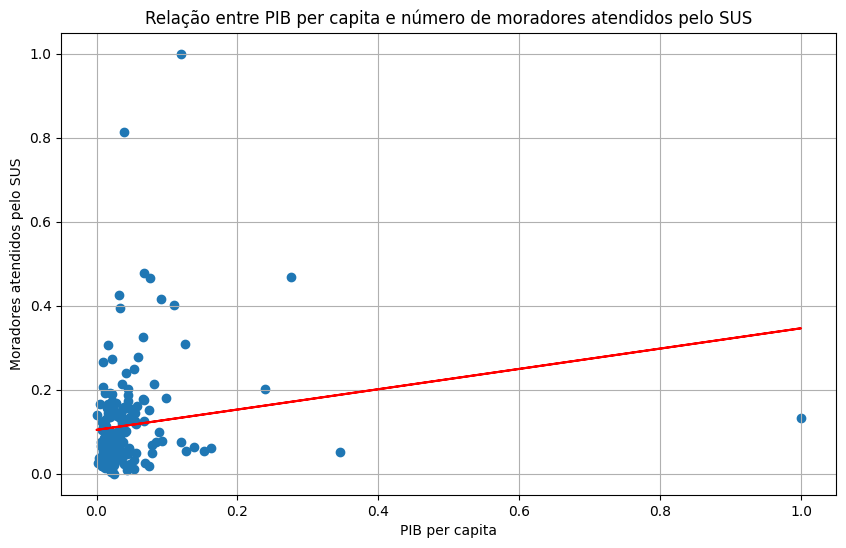

In [139]:
# Criar o gráfico de dispersão (scatter plot)

# Normalizar os dados para que possam ser comparados
X = merged_df["PIB"].values.reshape(-1, 1)
y = merged_df["Moradores_SUS"].values.reshape(-1, 1)
X = scaler.fit_transform(X).flatten()
y = scaler.fit_transform(y).flatten()
m, b = np.polyfit(X, y, 1)  # Cálculo do coeficiente angular e linear da reta

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, m * X + b, color="red", label=f"Regressão Linear (y={m:.2f}x + {b:.2f})")
plt.title("Relação entre PIB per capita e número de moradores atendidos pelo SUS")
plt.xlabel("PIB per capita")
plt.ylabel("Moradores atendidos pelo SUS")
plt.grid(True)

### Indicador #2 - Mortalidade infantil.

O segundo indicador busca inferir a relação entre a taxa de mortalidade infantil e o número de pessoas atendidas pelo SUS por município, a hipótese sendo que com mais pessoas utilizando o SUS, menor será a taxa de mortalidade infantil.

Leitura e tratamento dos dados.

In [140]:
# Carregar os dados dos arquivos CSV
mort_df = pd.read_csv(
  "../data/mortalidade_infantil.csv",
  header=0,
  dtype={
    'Local': 'string',
    'MortInfantil': 'string'
  }
)

mort_df.drop(mort_df[mort_df['MortInfantil'] == "-"].index, inplace = True)

mort_df["MortInfantil"] = pd.to_numeric(mort_df["MortInfantil"])

# Normalizar os nomes dos municípios (remover acentos e transformar em letras maiúsculas para combinar corretamente)
mort_df["Local"] = (
    mort_df["Local"]
    .str.upper()
    .str.normalize("NFKD")
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
)

# Unir os DataFrames pelos municípios
merged_df = pd.merge(
    mort_df, moradores_df, left_on="Local", right_on="MUNICÍPIO", how="inner"
)

# Renomear colunas para facilitar a compreensão
merged_df = merged_df.rename(
    columns={"TOTAL_MORADORES": "Moradores_SUS"}
).drop(columns=["MUNICÍPIO"])

merged_df

,Local,MortInfantil,Moradores_SUS
0,ABAIARA,6.71,231
1,ACARAPE,10.87,495
2,ACARAU,2.06,2368
3,ACOPIARA,11.56,1331
4,AIUABA,18.4,570
...,...,...,...
160,URUBURETAMA,12.86,1524
161,URUOCA,5.78,735
162,VARJOTA,3.86,675
163,VARZEA ALEGRE,12.38,874


Criando gráfico de dispersão.

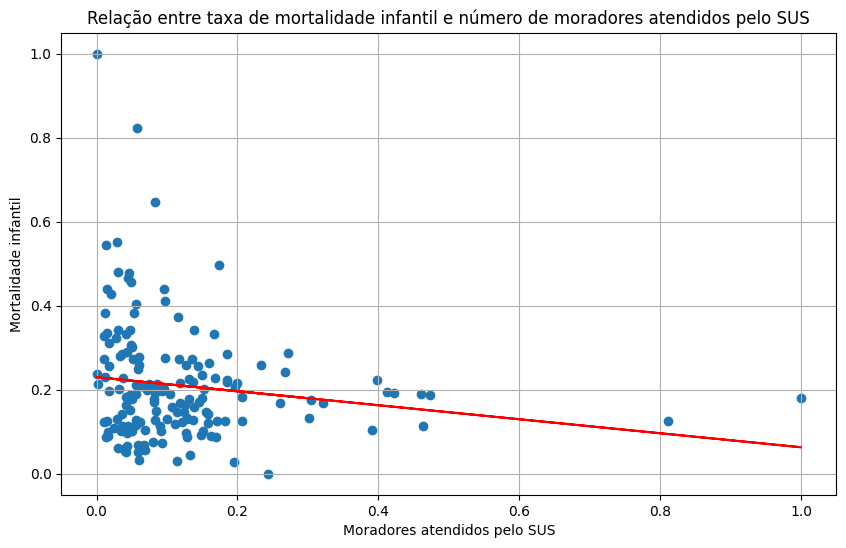

In [141]:
# Criar o gráfico de dispersão (scatter plot)

# Normalizar os dados para que possam ser comparados
X = merged_df["Moradores_SUS"].values.reshape(-1, 1)
y = merged_df["MortInfantil"].values.reshape(-1, 1)
X = scaler.fit_transform(X).flatten()
y = scaler.fit_transform(y).flatten()
m, b = np.polyfit(X, y, 1)  # Cálculo do coeficiente angular e linear da reta

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, m * X + b, color="red", label=f"Regressão Linear (y={m:.2f}x + {b:.2f})")
plt.title("Relação entre taxa de mortalidade infantil e número de moradores atendidos pelo SUS")
plt.xlabel("Moradores atendidos pelo SUS")
plt.ylabel("Mortalidade infantil")
plt.grid(True)

### Indicador #3 - Densidade demográfica.

O terceiro indicador busca inferir a relação entre a densidade demográfica e o número de pessoas atendidas pelo SUS por município, a hipótese sendo que o quão maior for a densidade demográfica do município, mais pessoas utilizarão o SUS.

Leitura e tratamento dos dados.

In [142]:
# Carregar os dados dos arquivos CSV
dens_df = pd.read_csv(
  "../data/densidade.csv",
  header=0,
  dtype={
    'Local': 'string',
    'MortInfantil': 'float'
  }
)

# Normalizar os nomes dos municípios (remover acentos e transformar em letras maiúsculas para combinar corretamente)
dens_df["Local"] = (
    dens_df["Local"]
    .str.upper()
    .str.normalize("NFKD")
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
)

# Unir os DataFrames pelos municípios
merged_df = pd.merge(
    dens_df, moradores_df, left_on="Local", right_on="MUNICÍPIO", how="inner"
)

# Renomear colunas para facilitar a compreensão
merged_df = merged_df.rename(
    columns={"TOTAL_MORADORES": "Moradores_SUS"}
).drop(columns=["MUNICÍPIO"])

merged_df

,Local,Densidade,Moradores_SUS
0,ABAIARA,55.51,231
1,ACARAPE,107.90,495
2,ACARAU,77.47,2368
3,ACOPIARA,19.95,1331
4,AIUABA,5.77,570
...,...,...,...
178,URUBURETAMA,203.11,1524
179,URUOCA,19.70,735
180,VARJOTA,101.01,675
181,VARZEA ALEGRE,46.97,874


Criando gráfico de dispersão.

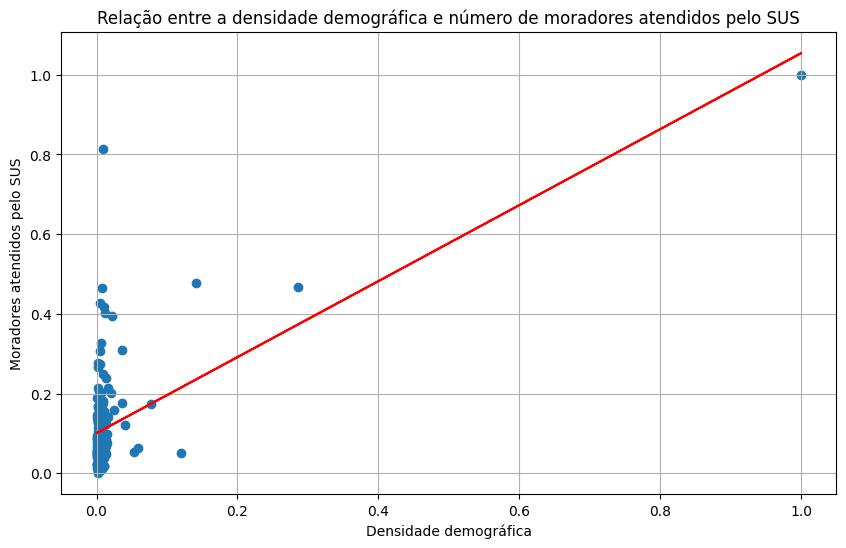

In [143]:
# Criar o gráfico de dispersão (scatter plot)

# Normalizar os dados para que possam ser comparados
X = merged_df["Densidade"].values.reshape(-1, 1)
y = merged_df["Moradores_SUS"].values.reshape(-1, 1)
X = scaler.fit_transform(X).flatten()
y = scaler.fit_transform(y).flatten()
m, b = np.polyfit(X, y, 1)  # Cálculo do coeficiente angular e linear da reta

m, b = np.polyfit(X, y, 1)  # m é a inclinação, b é o intercepto

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, m * X + b, color="red", label=f"Regressão Linear (y={m:.2f}x + {b:.2f})")
plt.title("Relação entre a densidade demográfica e número de moradores atendidos pelo SUS")
plt.xlabel("Densidade demográfica")
plt.ylabel("Moradores atendidos pelo SUS")
plt.grid(True)

### Indicador #4 - Esgotamento sanitário.

O quarto indicador busca inferir a relação entre a taxa de pessoas com acesso à esgotamento sanitário adequado e o número de pessoas atendidas pelo SUS por município, a hipótese sendo que o quão maior for a taxa de acesso à esgotamento, menos pessoas utilizarão o SUS.

Leitura e tratamento dos dados.

In [144]:
# Carregar os dados dos arquivos CSV
esgot_df = pd.read_csv(
  "../data/esgotamento_sanitario.csv",
  header=0,
  dtype={
    'Local': 'string',
    'EsgotamentoSanitario': 'float'
  }
)

# Normalizar os nomes dos municípios (remover acentos e transformar em letras maiúsculas para combinar corretamente)
esgot_df["Local"] = (
    esgot_df["Local"]
    .str.upper()
    .str.normalize("NFKD")
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
)

# Unir os DataFrames pelos municípios
merged_df = pd.merge(
    esgot_df, moradores_df, left_on="Local", right_on="MUNICÍPIO", how="inner"
)

# Renomear colunas para facilitar a compreensão
merged_df = merged_df.rename(
    columns={"TOTAL_MORADORES": "Moradores_SUS"}
).drop(columns=["MUNICÍPIO"])

merged_df

,Local,EsgotamentoSanitario,Moradores_SUS
0,ABAIARA,8.0,231
1,ACARAPE,40.1,495
2,ACARAU,16.5,2368
3,ACOPIARA,18.1,1331
4,AIUABA,9.8,570
...,...,...,...
178,URUBURETAMA,18.8,1524
179,URUOCA,23.1,735
180,VARJOTA,25.5,675
181,VARZEA ALEGRE,17.6,874


Criando gráfico de dispersão.

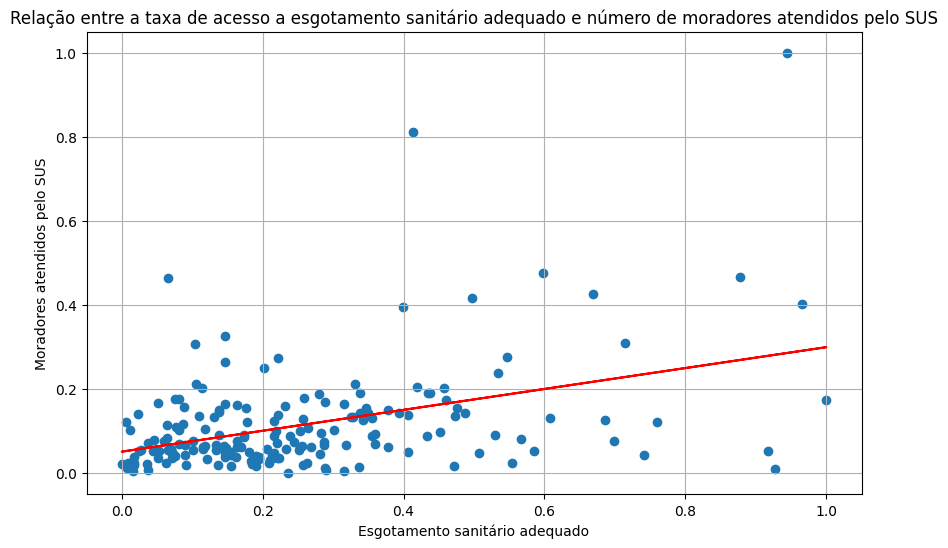

In [145]:
# Criar o gráfico de dispersão (scatter plot)

# Normalizar os dados para que possam ser comparados
X = merged_df["EsgotamentoSanitario"].values.reshape(-1, 1)
y = merged_df["Moradores_SUS"].values.reshape(-1, 1)
X = scaler.fit_transform(X).flatten()
y = scaler.fit_transform(y).flatten()
m, b = np.polyfit(X, y, 1)  # Cálculo do coeficiente angular e linear da reta

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, m * X + b, color="red", label=f"Regressão Linear (y={m:.2f}x + {b:.2f})")
plt.title("Relação entre a taxa de acesso a esgotamento sanitário adequado e número de moradores atendidos pelo SUS")
plt.xlabel("Esgotamento sanitário adequado")
plt.ylabel("Moradores atendidos pelo SUS")
plt.grid(True)

### Indicador #5 - População ocupada.

O quinto e último indicador busca inferir a relação entre a taxa de pessoas empregadas e o número de pessoas atendidas pelo SUS por município, a hipótese sendo que o quão maior for a taxa de pessoas empregadas, mais pessoas utilizarão o SUS, dado o desgaste físico e mental do trabalho.

Leitura e tratamento dos dados.

In [146]:
# Carregar os dados dos arquivos CSV
popocupada_df = pd.read_csv(
  "../data/populacao_ocupada.csv",
  header=0,
  dtype={
    'Local': 'string',
    'PopulacaoOcupada': 'float'
  }
)

# Normalizar os nomes dos municípios (remover acentos e transformar em letras maiúsculas para combinar corretamente)
popocupada_df["Local"] = (
    popocupada_df["Local"]
    .str.upper()
    .str.normalize("NFKD")
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
)

# Unir os DataFrames pelos municípios
merged_df = pd.merge(
    popocupada_df, moradores_df, left_on="Local", right_on="MUNICÍPIO", how="inner"
)

# Renomear colunas para facilitar a compreensão
merged_df = merged_df.rename(
    columns={"TOTAL_MORADORES": "Moradores_SUS"}
).drop(columns=["MUNICÍPIO"])

merged_df

,Local,PopulacaoOcupada,Moradores_SUS
0,ABAIARA,11.80,231
1,ACARAPE,13.80,495
2,ACARAU,9.65,2368
3,ACOPIARA,8.54,1331
4,AIUABA,10.35,570
...,...,...,...
178,URUBURETAMA,14.53,1524
179,URUOCA,12.57,735
180,VARJOTA,16.30,675
181,VARZEA ALEGRE,10.39,874


Criando gráfico de dispersão.

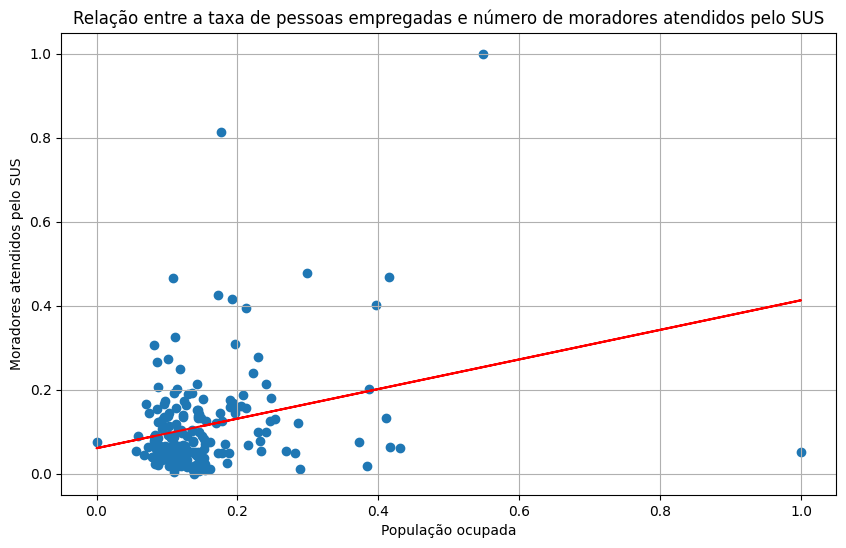

In [147]:
# Criar o gráfico de dispersão (scatter plot)

# Normalizar os dados para que possam ser comparados
X = merged_df["PopulacaoOcupada"].values.reshape(-1, 1)
y = merged_df["Moradores_SUS"].values.reshape(-1, 1)
X = scaler.fit_transform(X).flatten()
y = scaler.fit_transform(y).flatten()
m, b = np.polyfit(X, y, 1)  # Cálculo do coeficiente angular e linear da reta

plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X, m * X + b, color="red", label=f"Regressão Linear (y={m:.2f}x + {b:.2f})")
plt.title("Relação entre a taxa de pessoas empregadas e número de moradores atendidos pelo SUS")
plt.xlabel("População ocupada")
plt.ylabel("Moradores atendidos pelo SUS")
plt.grid(True)